In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [87]:
X_train = np.arange(10, dtype='float32').reshape((10, 1)) 
# X_train = X_train.reshape(1, 10).squeeze()
Y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,7.4, 8.0,9.0], dtype='float32')

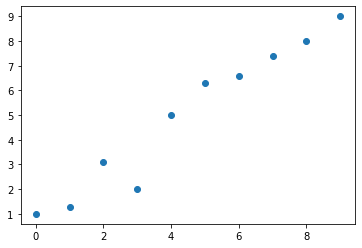

In [89]:
plt.plot(X_train, Y_train, 'o', label='Training data')
plt.show()

### Standardize features

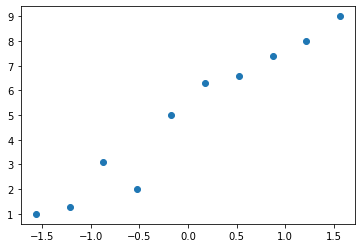

In [90]:
X_norm = (X_train - X_train.mean()) / X_train.std()


# Transform both numpy arrays to PyTorch tensors
X_train = torch.from_numpy(X_norm).float() 
Y_train = torch.from_numpy(Y_train).float()

plt.plot(X_norm, Y_train, 'o', label='Training data')
plt.show()

### Prepare Data

In [130]:
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data import DataLoader

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
    
bs = 1
# dataset = JointDataset(X_norm, Y_train)
dataset = TensorDataset(X_train, Y_train)
dataloader = DataLoader(dataset, batch_size=bs, shuffle=True)

for i, batch in enumerate(dataloader):
    print(i, batch)

0 [tensor([[1.5667]]), tensor([9.])]
1 [tensor([[0.5222]]), tensor([6.6000])]
2 [tensor([[-1.5667]]), tensor([1.])]
3 [tensor([[1.2185]]), tensor([8.])]
4 [tensor([[-1.2185]]), tensor([1.3000])]
5 [tensor([[-0.1741]]), tensor([5.])]
6 [tensor([[-0.8704]]), tensor([3.1000])]
7 [tensor([[-0.5222]]), tensor([2.])]
8 [tensor([[0.1741]]), tensor([6.3000])]
9 [tensor([[0.8704]]), tensor([7.4000])]


In [131]:
torch.manual_seed(1)

weight = torch.randn(1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)

def model(xb):
    return xb * weight + bias

def loss_fn(target, input):
    return (input - target).pow(2).mean()

### Explicit training loop (SGD)

In [132]:
lr = 0.001
num_epochs = 1000
log_epochs = 10

for epoch in range(num_epochs):
    for i, batch in enumerate(dataloader):
        x_batch = batch[0]
        y_batch = batch[1]
        pred = model(x_batch)
        # Compute the loss between predicted and target linear regression prediction
        loss = loss_fn(input = pred, target = y_batch.long())
        # Backpropagate the error
        loss.backward()
        # Perform gradient descent step by updating model parameters weights and biases (perform update rule)
        with torch.no_grad():
            # Update the parameters with a SGD update step
            weight -= weight.grad * lr
            bias -= bias.grad * lr
            # Reset the gradients
            weight.grad.zero_()
            bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 39.8977
Epoch 10  Loss 23.7719
Epoch 20  Loss 1.0158
Epoch 30  Loss 14.8444
Epoch 40  Loss 12.4277
Epoch 50  Loss 4.9904
Epoch 60  Loss 0.7894
Epoch 70  Loss 3.7337
Epoch 80  Loss 2.3939
Epoch 90  Loss 0.4472
Epoch 100  Loss 1.1216
Epoch 110  Loss 1.3220
Epoch 120  Loss 0.1076
Epoch 130  Loss 0.5718
Epoch 140  Loss 0.2256
Epoch 150  Loss 1.4922
Epoch 160  Loss 0.0495
Epoch 170  Loss 0.0064
Epoch 180  Loss 0.0017
Epoch 190  Loss 0.0305
Epoch 200  Loss 0.0092
Epoch 210  Loss 0.0014
Epoch 220  Loss 0.1782
Epoch 230  Loss 0.6164
Epoch 240  Loss 0.2676
Epoch 250  Loss 0.2712
Epoch 260  Loss 0.4788
Epoch 270  Loss 1.9238
Epoch 280  Loss 0.0017
Epoch 290  Loss 0.0021
Epoch 300  Loss 0.0004
Epoch 310  Loss 0.4584
Epoch 320  Loss 0.2831
Epoch 330  Loss 0.4543
Epoch 340  Loss 0.4527
Epoch 350  Loss 1.9607
Epoch 360  Loss 0.0385
Epoch 370  Loss 0.0169
Epoch 380  Loss 0.2862
Epoch 390  Loss 0.2863
Epoch 400  Loss 0.0000
Epoch 410  Loss 0.2873
Epoch 420  Loss 0.0396
Epoch 430  Loss 0.

Final Parameters: 2.6806108951568604 4.800034523010254
torch.Size([10])


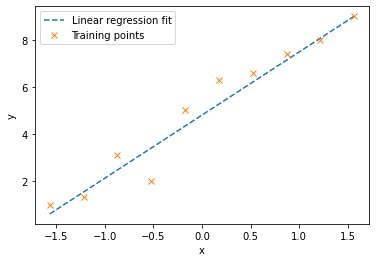

In [113]:
print('Final Parameters:', weight.item(), bias.item())

print(Y_train.shape)

Y_pred = model(X_train).detach()
Y_pred = Y_pred.numpy()

fig,ax = plt.subplots(figsize = (6,4))

ax.plot(X_train, Y_pred, '--', label = 'Linear regression fit')
ax.plot(X_train, Y_train, 'x', label = 'Training points')
ax.legend()
ax.set_ylabel("y")
ax.set_xlabel("x")
plt.show()

### Model training with torch.nn

In [127]:
import torch.nn as nn

input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)

# Define loss function
loss_fn = nn.MSELoss(reduction="mean")

# Define a SGD optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

for epoch in range(num_epochs):
    for i, batch in enumerate(dataloader):
        x_batch = batch[0]
        y_batch = batch[1] 
        # 1) Get model predictions
        y_pred = model(x_batch).squeeze()
        # 2) Calculate the loss
        loss = loss_fn(y_batch, y_pred)
        # 3) Call backprop to compute the gradients
        loss.backward()
        # 4) Perform a gradient update step to update parameters
        optimizer.step()
        # 5) Reset gradients
        optimizer.zero_grad()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 60.9977
Epoch 10  Loss 51.4593
Epoch 20  Loss 11.6980
Epoch 30  Loss 13.1065
Epoch 40  Loss 9.0127
Epoch 50  Loss 7.2676
Epoch 60  Loss 5.9894
Epoch 70  Loss 4.6620
Epoch 80  Loss 2.5704
Epoch 90  Loss 1.6217
Epoch 100  Loss 1.1103
Epoch 110  Loss 2.0828
Epoch 120  Loss 0.5166
Epoch 130  Loss 0.0654
Epoch 140  Loss 1.3924
Epoch 150  Loss 1.9326
Epoch 160  Loss 0.4610
Epoch 170  Loss 0.1788
Epoch 180  Loss 0.1088
Epoch 190  Loss 2.2015
Epoch 200  Loss 0.1089
Epoch 210  Loss 0.0326
Epoch 220  Loss 0.3086
Epoch 230  Loss 0.0781
Epoch 240  Loss 0.8168
Epoch 250  Loss 0.0231
Epoch 260  Loss 0.0763
Epoch 270  Loss 0.2489
Epoch 280  Loss 0.0577
Epoch 290  Loss 0.2451
Epoch 300  Loss 0.0751
Epoch 310  Loss 0.2608
Epoch 320  Loss 0.0747
Epoch 330  Loss 0.0507
Epoch 340  Loss 0.0680
Epoch 350  Loss 0.7484
Epoch 360  Loss 0.2552
Epoch 370  Loss 2.4291
Epoch 380  Loss 2.4299
Epoch 390  Loss 0.0481
Epoch 400  Loss 0.0713
Epoch 410  Loss 0.0715
Epoch 420  Loss 0.0441
Epoch 430  Loss 2.

In [129]:
print("Final Parameters:", model.weight.item(), model.bias.item())

Final Parameters: 2.706695556640625 4.969920635223389
